In [1]:
import numpy as np
import numpy.linalg
import pandas as pd
import sklearn
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics, sklearn.decomposition
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns

# SVD decomposition and dimension reduction

In [2]:
X = pd.read_csv('bars.csv', header=None).values
X_noise_20 = pd.read_csv('bars_noise20.csv', header=None).values
X_noise_50 = pd.read_csv('bars_noise50.csv', header=None).values

In [3]:
X.shape

(10000, 64)

In [4]:
X[1]

array([  0,   0, 255,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,
         0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,
       255,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255,
       255,   0,   0, 255,   0,   0,   0,   0,   0, 255, 255, 255, 255,
       255, 255, 255, 255,   0,   0, 255,   0,   0,   0,   0,   0],
      dtype=int64)

In [5]:
X_noise_20[1]

array([  0,   0, 225,   0,   0,   0,  48,   0,  44,   0, 220,  70,   0,
        54,   0,  70,   6,   0, 186,   0,   0,   0,   0,  48,   8,   0,
       255,  15,   0,   0,  14,  60, 255, 173, 193, 225, 255, 169, 164,
       255,   0,  80, 166,  81,   0,   0,   8, 112, 255, 241, 255, 255,
       236, 255, 255, 255,   0,   0, 255,   1,   0,   6, 120,   5],
      dtype=int64)

In [6]:
def show_image(x):
    plt.imshow(x.reshape((8,8)), cmap='Greys')

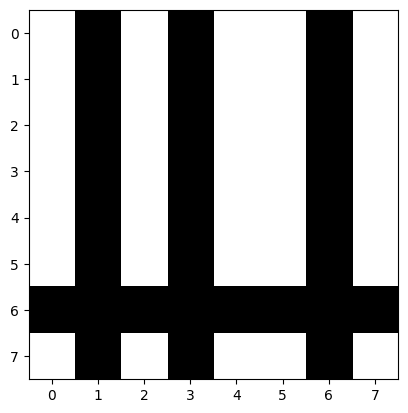

In [7]:
show_image(X[2])

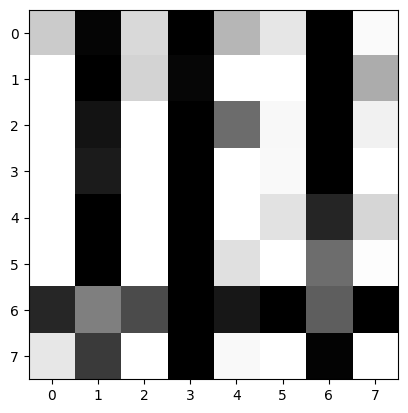

In [8]:
show_image(X_noise_20[2])

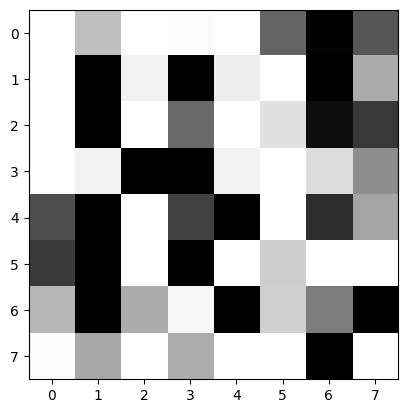

In [9]:
show_image(X_noise_50[2])

## SVD decompostioton

In [10]:
U, s, V_T = np.linalg.svd(X, full_matrices=True)
U.shape, s.shape, V_T.shape

((10000, 10000), (64,), (64, 64))

In [11]:
s

array([85163.72992057, 25918.78802989, 25885.20650461, 25866.61111402,
       25603.09250067, 25527.33634786, 25461.90923658, 25400.16904854,
       25323.96794768, 25273.05247869, 25090.65260469, 24985.09443308,
       24828.21166745, 24725.47151278, 24599.19377668,  4800.23207891,
        4759.42568525,  4752.02282845,  4714.65694697,  4693.37727937,
        4671.65765993,  4664.8800508 ,  4649.71482489,  4645.60988442,
        4627.47548092,  4613.28613569,  4608.32596123,  4601.90708787,
        4598.48440201,  4592.10180099,  4566.68918604,  4564.57307661,
        4539.47946295,  4528.18799301,  4515.34355164,  4503.88836915,
        4496.2987919 ,  4490.36008691,  4475.56266412,  4466.33868976,
        4461.80509601,  4454.28225144,  4444.18087738,  4433.82306676,
        4426.93951122,  4412.70949494,  4410.35912898,  4407.39023681,
        4392.68325091,  4367.7956838 ,  4356.32995984,  4352.68991712,
        4343.81015817,  4333.71349581,  4328.56992482,  4316.97332939,
      

What does the values in vector **s** represent?

### Reconstruct complete matrix and check error

In [12]:
np.diag(s)

array([[85163.72992057,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        , 25918.78802989,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        , 25885.20650461, ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [    0.        ,     0.        ,     0.        , ...,
         4218.36279764,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,  4216.42652516,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,  4141.90618514]])

In [13]:
R = U[:, :64].dot(np.diag(s)).dot(V_T)
X-R

array([[-7.42451218e-14,  1.34890883e-11,  1.12801177e-11, ...,
         2.33058017e-12,  1.42108547e-13,  1.16529009e-12],
       [-1.16351730e-13, -6.08428131e-14,  8.98126018e-11, ...,
         4.23754961e-11,  4.95545421e-11,  3.49177856e-11],
       [-3.28572497e-13,  6.53699317e-13,  2.75249927e-12, ...,
         5.93366462e-12,  1.12549969e-11,  1.03544795e-11],
       ...,
       [-2.07221777e-13, -2.55795385e-13,  1.56319402e-12, ...,
         3.73625978e-14,  5.76121511e-13, -4.11166629e-13],
       [-3.97903932e-13, -2.58847074e-13, -5.66230302e-13, ...,
        -1.39041076e-12, -1.09297032e-12,  3.97903932e-13],
       [-2.15047497e-13,  1.76245816e-13, -1.10733826e-13, ...,
        -5.68434189e-14, -5.68434189e-14, -2.84217094e-13]])

### Use only 5 main vectors (which represent reduction to 5 dimensions). Create reconstructed matrix and compare it with original one.
- https://csiu.github.io/blog//img/figure/2017-04-16/svd.png
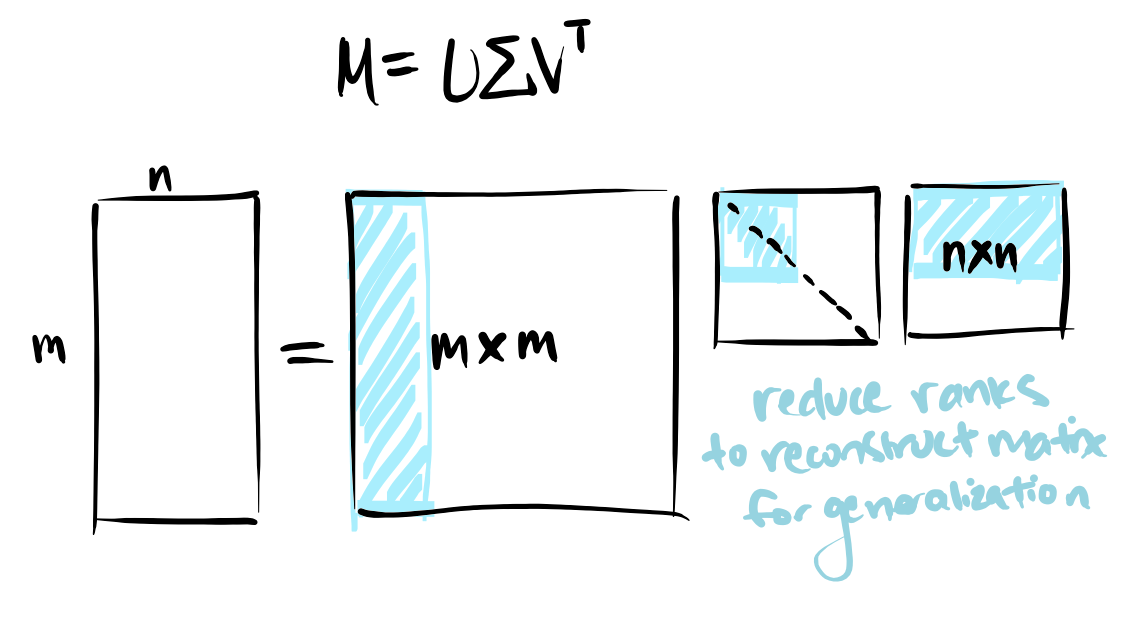

In [14]:
U[:, :5]

array([[-0.01089724,  0.02019641, -0.00491279,  0.01643246,  0.00838835],
       [-0.00824357,  0.01339253, -0.01285844,  0.0033604 ,  0.00822905],
       [-0.01084728, -0.005671  , -0.01018208,  0.01683211, -0.01144061],
       ...,
       [-0.01087723, -0.01541497, -0.01822903,  0.00227725, -0.00055324],
       [-0.01086102, -0.00116561, -0.0061415 , -0.02145552, -0.00405246],
       [-0.00823218,  0.01164858, -0.00076543,  0.02442473,  0.01046707]])

In [15]:
V_T[:5, :]

array([[-0.12576034, -0.12583471, -0.12446459, -0.12522232, -0.12453633,
        -0.12479076, -0.12320246, -0.12501406, -0.12368075, -0.12438685,
        -0.12219952, -0.12274359, -0.1239547 , -0.12395804, -0.12242578,
        -0.12374513, -0.12579543, -0.12611035, -0.12475121, -0.12483118,
        -0.1258248 , -0.125511  , -0.1238515 , -0.12529944, -0.1255637 ,
        -0.12730238, -0.12488608, -0.12613748, -0.12474634, -0.12421956,
        -0.12321001, -0.12535877, -0.12649177, -0.12752608, -0.1254781 ,
        -0.12578643, -0.12522948, -0.12697614, -0.12493317, -0.12562678,
        -0.12440544, -0.12568559, -0.1242691 , -0.12305136, -0.12453197,
        -0.12403298, -0.12287156, -0.12450303, -0.12667953, -0.12667078,
        -0.12424151, -0.1246307 , -0.12455422, -0.1243726 , -0.12256402,
        -0.12524289, -0.12736486, -0.12835399, -0.12557424, -0.1263055 ,
        -0.12606162, -0.12555467, -0.12399751, -0.12668234],
       [-0.14879275, -0.3026219 , -0.14459322, -0.15534514, -0.

## Where can we find vector space in reduced dimension?

In [16]:
U[:, :5].shape

(10000, 5)

In [17]:
U[:, :5]

array([[-0.01089724,  0.02019641, -0.00491279,  0.01643246,  0.00838835],
       [-0.00824357,  0.01339253, -0.01285844,  0.0033604 ,  0.00822905],
       [-0.01084728, -0.005671  , -0.01018208,  0.01683211, -0.01144061],
       ...,
       [-0.01087723, -0.01541497, -0.01822903,  0.00227725, -0.00055324],
       [-0.01086102, -0.00116561, -0.0061415 , -0.02145552, -0.00405246],
       [-0.00823218,  0.01164858, -0.00076543,  0.02442473,  0.01046707]])

## Reconstruction from reduced space and error calculation

In [18]:
R = U[:,:5].dot(np.diag(s[:5])).dot(V_T[:5, :])
R.shape

(10000, 64)

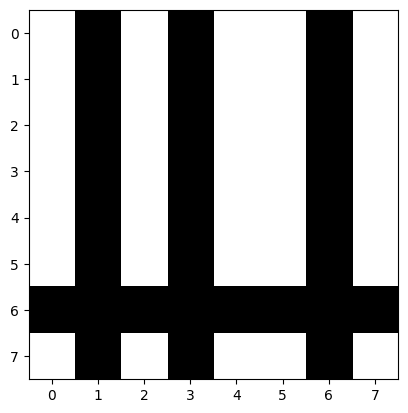

In [19]:
show_image(X[2])

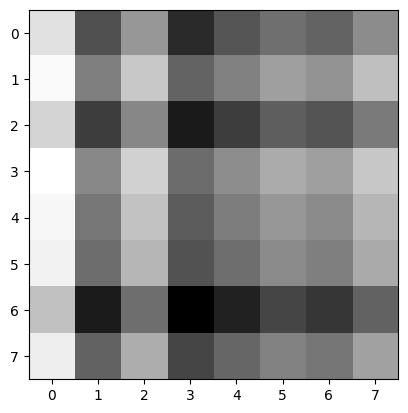

In [20]:
show_image(R[2])

In [21]:
print(X[2]-R[2])

[   3.82238709   70.50902768  -95.41048352   33.90280998 -179.13178553
 -145.81480685   95.59350276 -108.77944599   60.25860472  129.8385979
  -36.51782997   94.86620649 -122.89825575  -87.74271955  153.62575602
  -51.22577216  -18.52101325   51.3090643  -115.86903453   16.47845791
 -203.63176033 -166.7681105    74.90671194 -132.13253529   74.7696726
  141.03345957  -23.27925851  105.53868741 -107.70286201  -73.47480251
  167.43853464  -38.99568713   52.03450765  120.35339376  -45.42749685
   85.57631992 -128.14689513  -95.33095459  144.40681941  -61.93270782
   37.23970361  107.36359866  -62.10231846   72.1981188  -146.37543541
 -110.64707851  129.76684152  -75.21113189  207.08629063   18.73798945
  108.64372768  -14.73783008   24.71831792   60.48464167   45.70419344
   93.05369129   27.94050866   93.36719537  -70.72630954   59.74996291
 -155.85820122 -120.68436496  119.83005621  -85.20991955]


In [22]:
print(X-R)

[[ 4.23051495e+00  4.27071150e+01 -6.32099388e+01 ... -1.02635171e+01
  -5.78117388e+01  4.00232361e+01]
 [-1.17531994e+00  4.55843404e+01  2.16815382e+02 ... -1.20211711e+02
  -1.76885511e+02 -1.71087580e+02]
 [ 3.82238709e+00  7.05090277e+01 -9.54104835e+01 ... -1.20684365e+02
   1.19830056e+02 -8.52099196e+01]
 ...
 [-8.76916869e+01  4.15640460e+01  1.15665709e+02 ... -1.64401512e+01
  -4.92478860e+01 -1.01238291e+02]
 [ 1.06205197e+02 -9.65794359e+01 -8.49420450e+01 ...  3.13292689e+01
   3.16222278e+01  1.59831169e+02]
 [ 4.96907039e-02 -8.46391660e+00 -8.48537557e+01 ... -1.85738584e+01
  -5.32766447e+01  8.38954314e+01]]


In [23]:
np.linalg.norm(X-R)

85409.48396501163

# Individual tasks

**Objective of first task is to leverage noise reduction when working with reduced dimension space.**

**Second task should demonstare usage of dimension reductions techniques for 2D visualization and showing clustering results in that vis.**

---

## Task 1(1p) : Complete following tasks for dimension reduction using SVD over our toy datasets (bars, bars_noise20, bars_noise50)

### Loading all vectors

In [30]:
U, s, V_T = np.linalg.svd(X, full_matrices=True)
U_20, s_20, V_T_20 = np.linalg.svd(X_noise_20, full_matrices=True)
U_50, s_50, V_T_50 = np.linalg.svd(X_noise_50, full_matrices=True)

dimensions= [6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63]

81505.42957467752
Norm: 81505.42957467752, dimension: 6


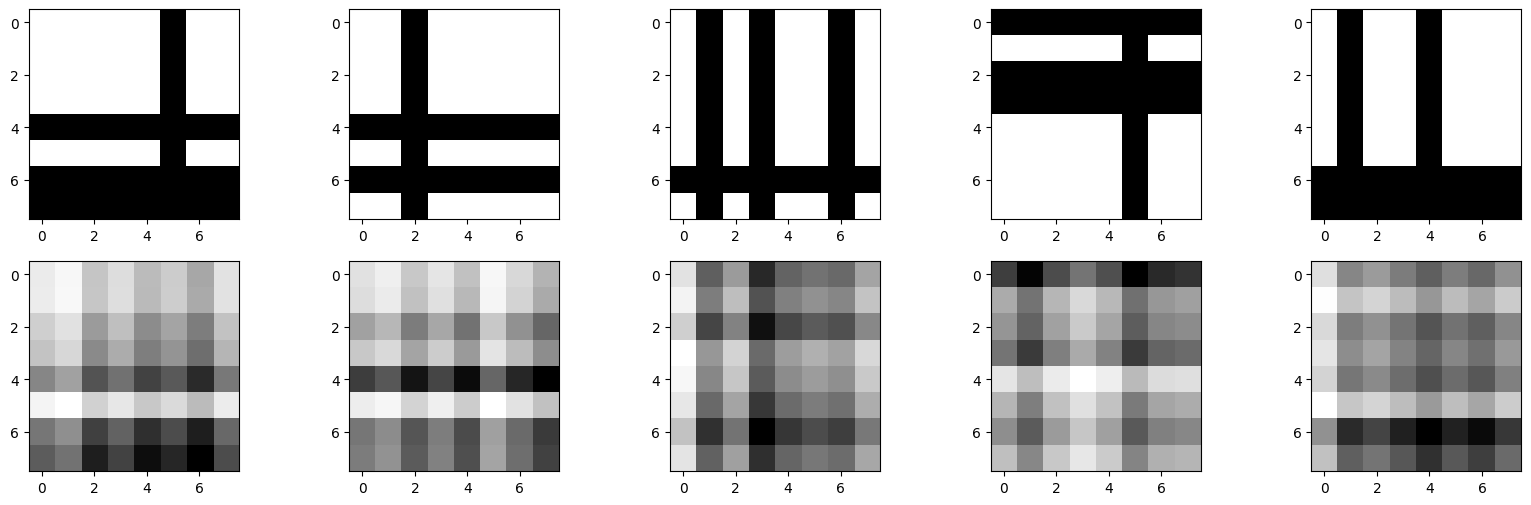

68617.44885866548
Norm: 68617.44885866548, dimension: 9


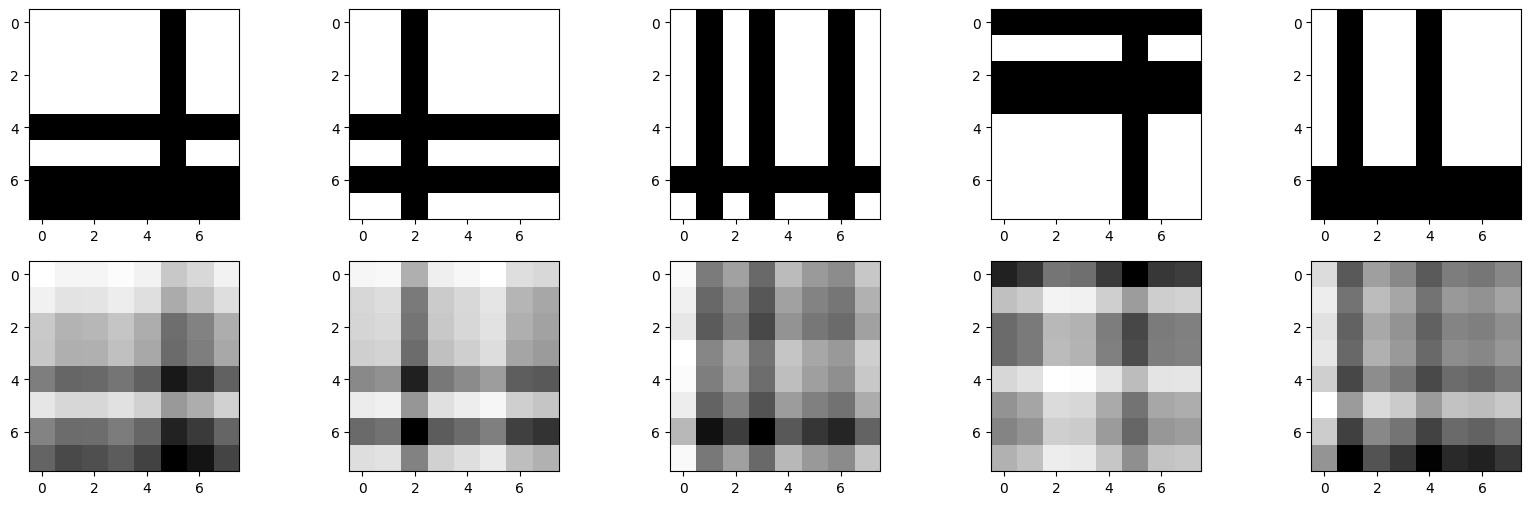

53064.40722670531
Norm: 53064.40722670531, dimension: 12


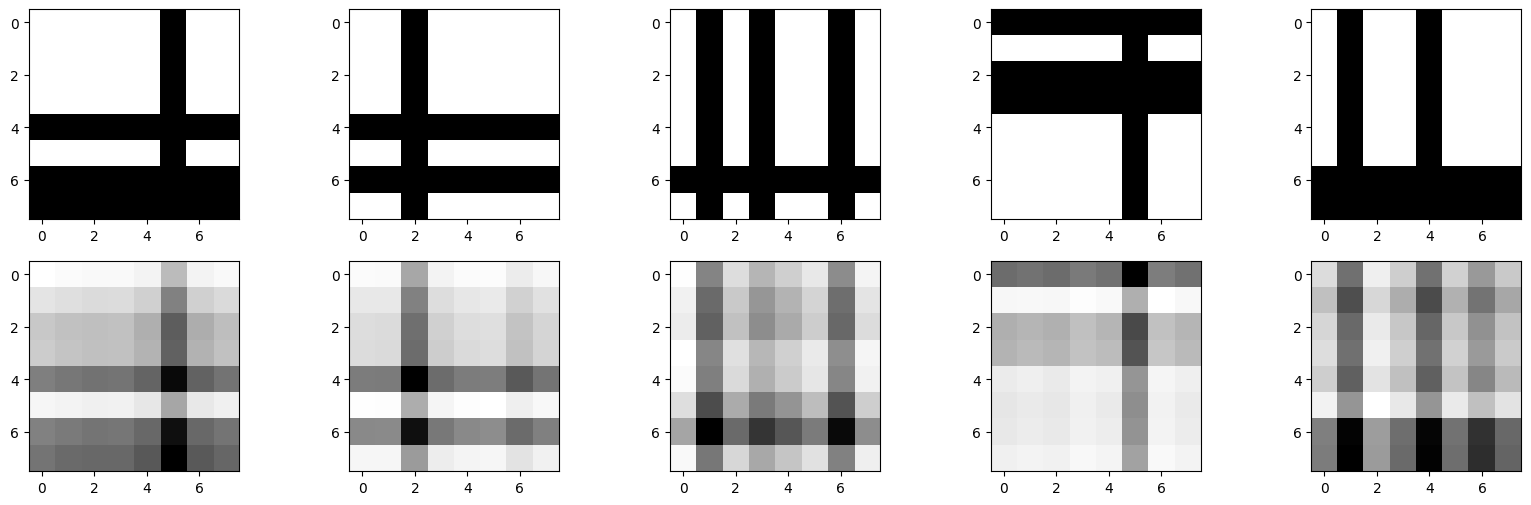

31351.585984222835
Norm: 31351.585984222835, dimension: 15


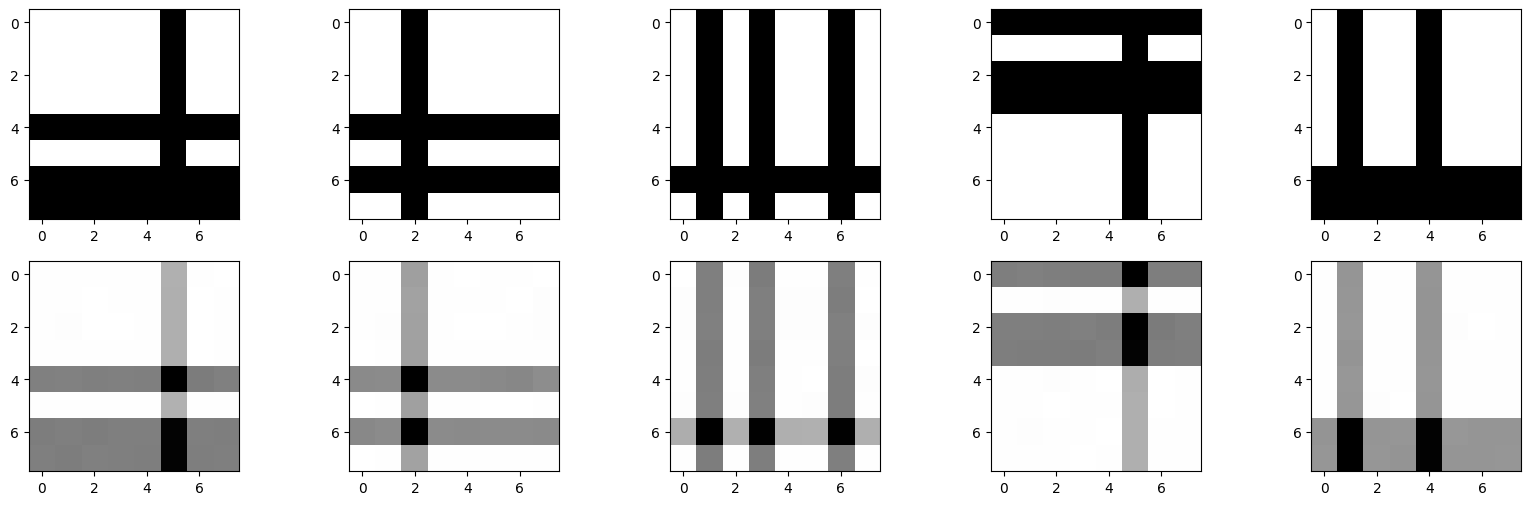

30243.11263575904
Norm: 30243.11263575904, dimension: 18


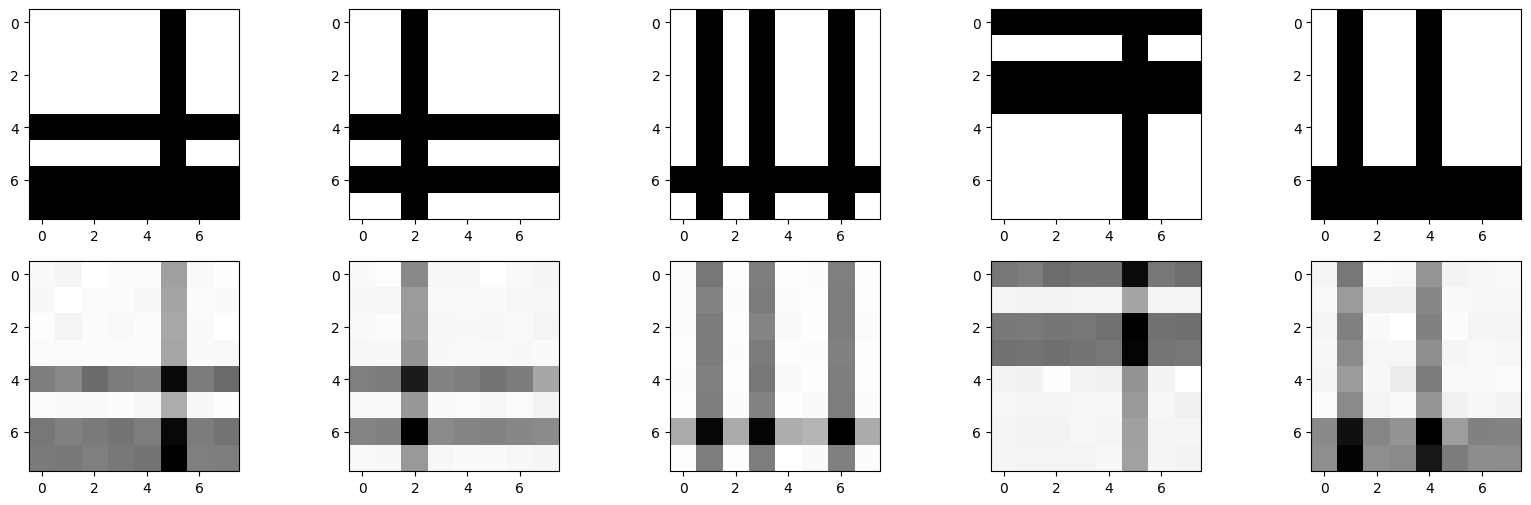

29130.150981303024
Norm: 29130.150981303024, dimension: 21


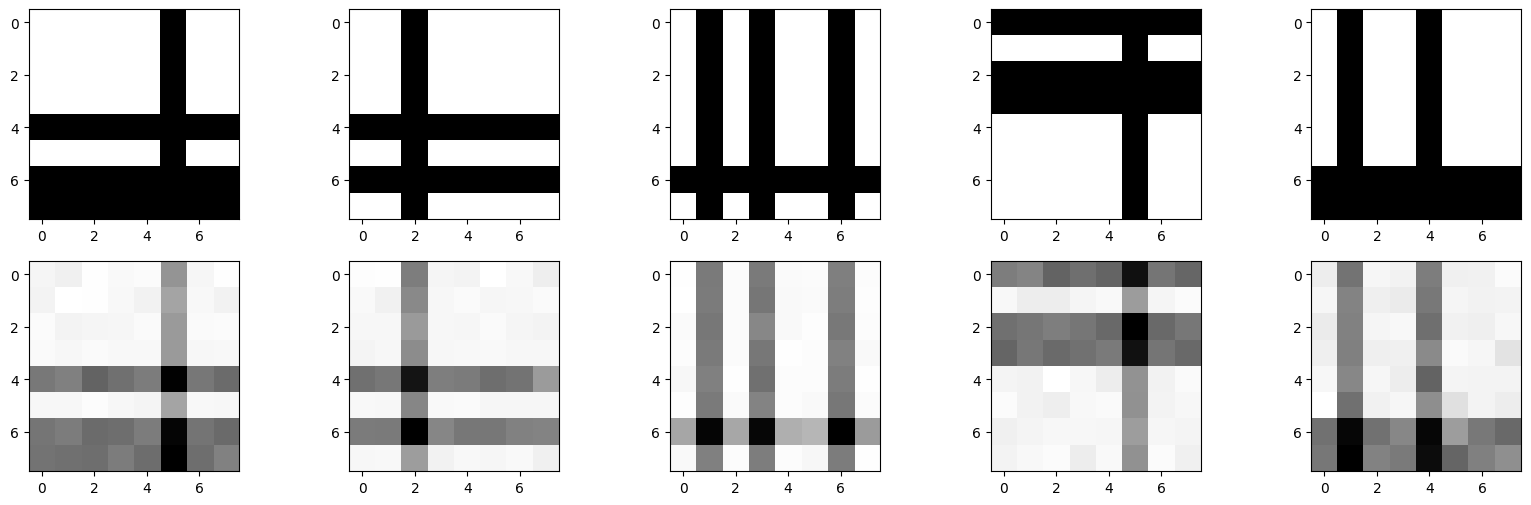

27992.910730293323
Norm: 27992.910730293323, dimension: 24


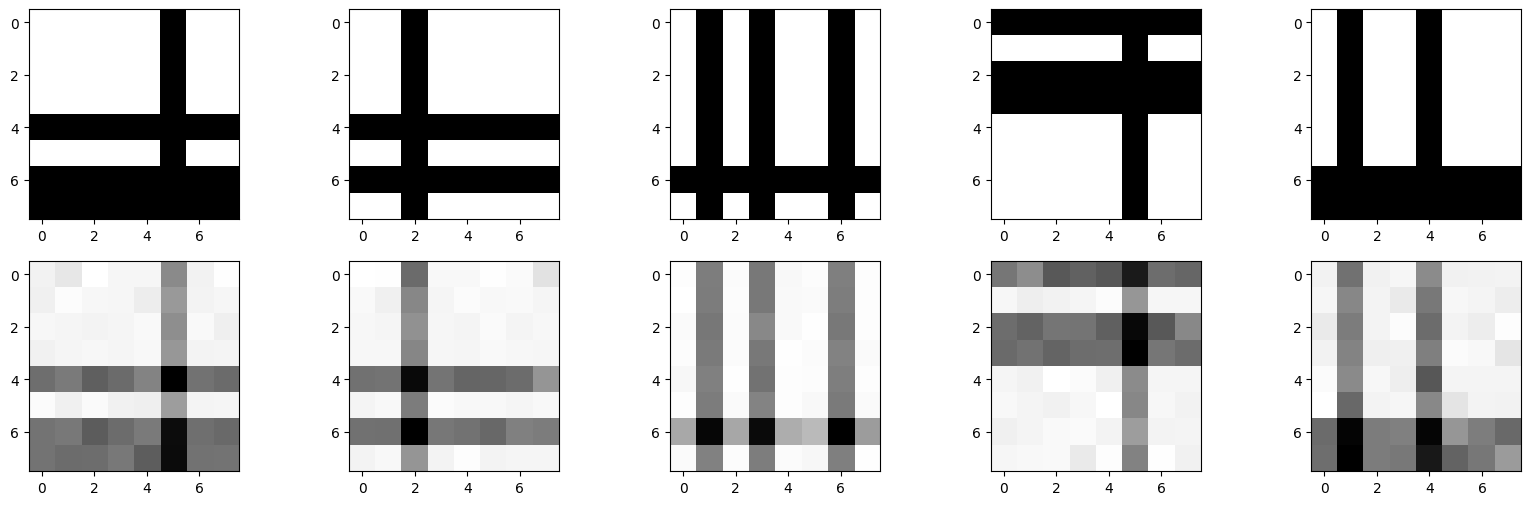

26826.674126564852
Norm: 26826.674126564852, dimension: 27


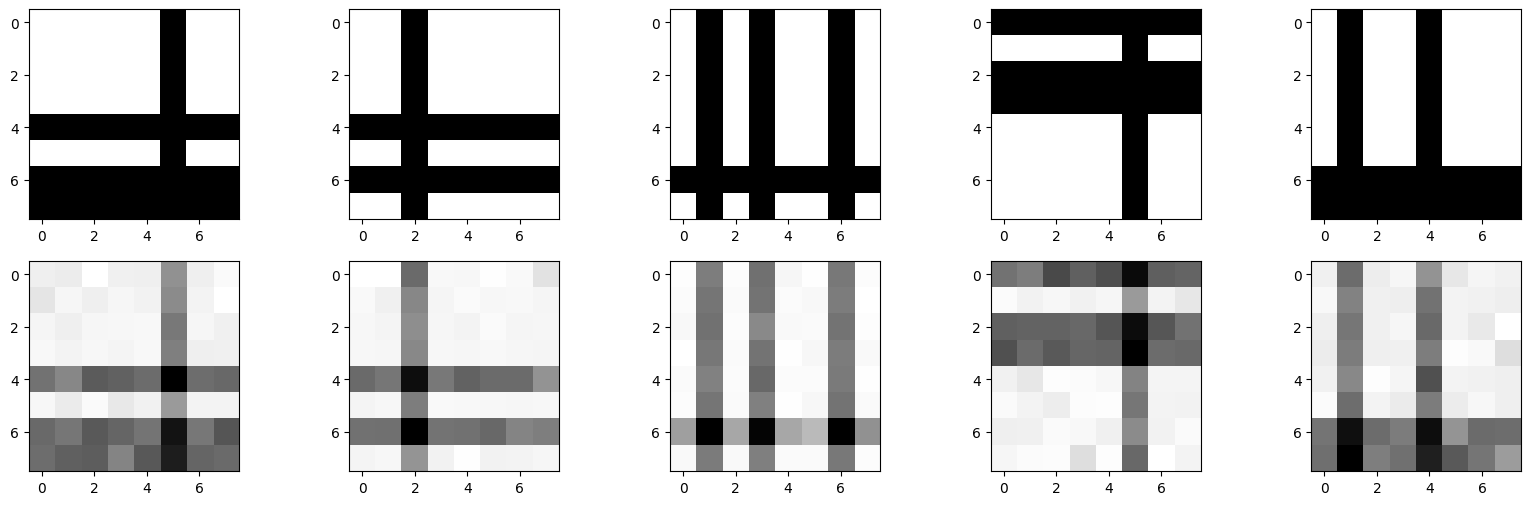

25617.56112711247
Norm: 25617.56112711247, dimension: 30


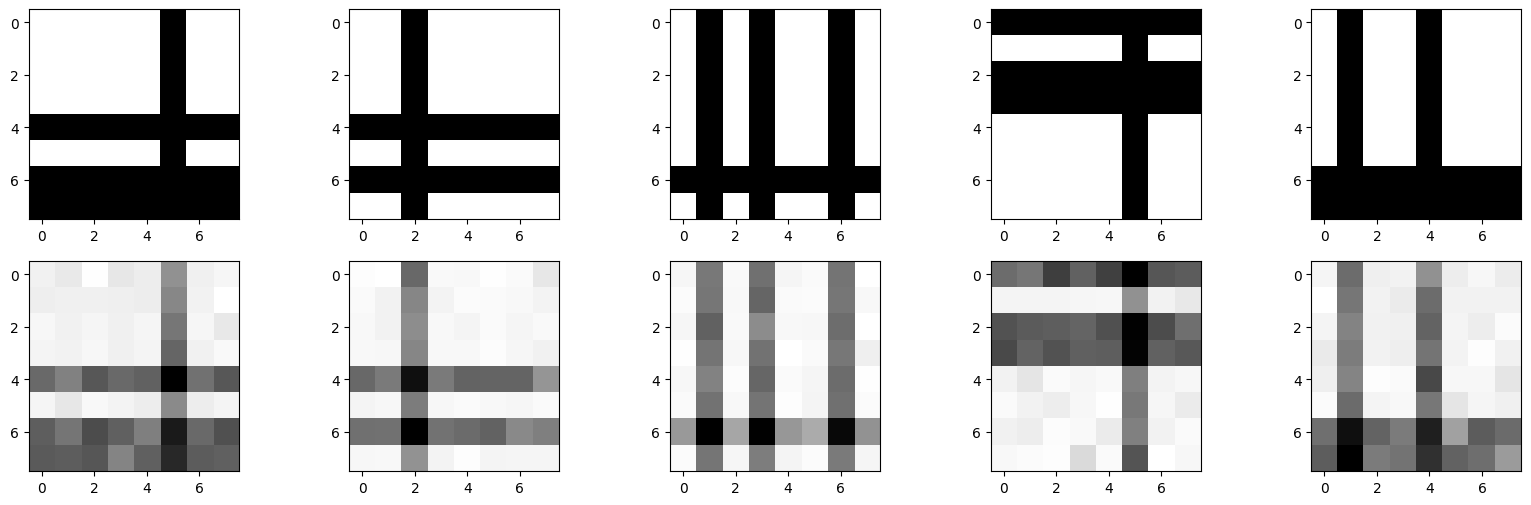

24371.347660995463
Norm: 24371.347660995463, dimension: 33


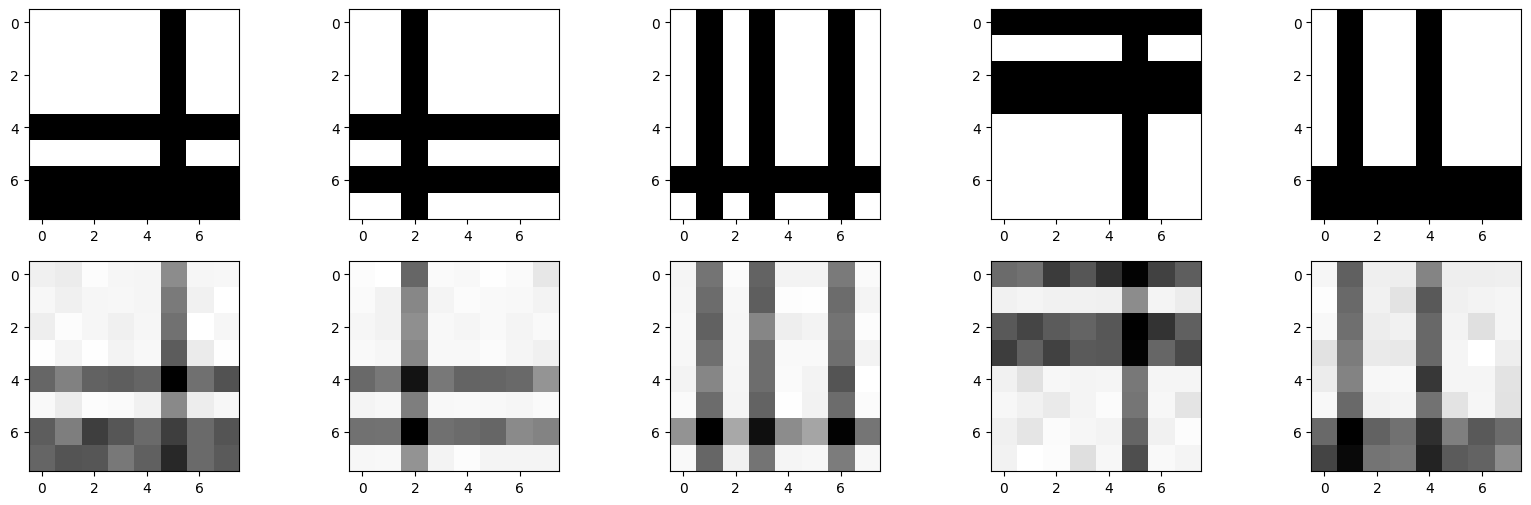

23082.130804626508
Norm: 23082.130804626508, dimension: 36


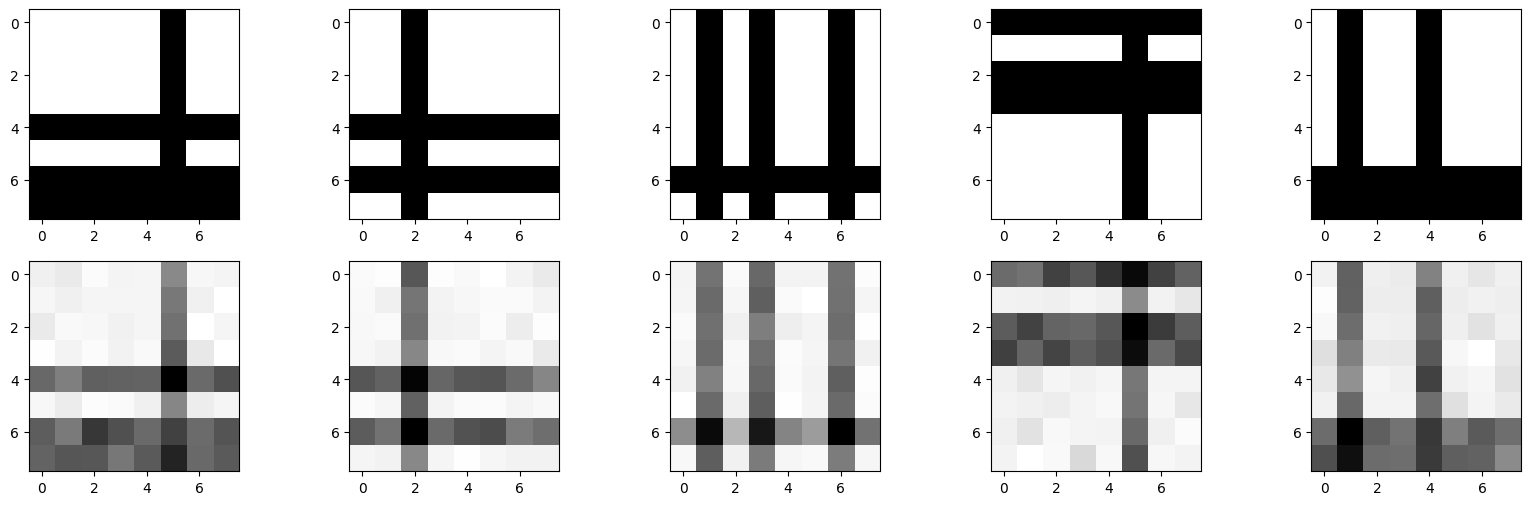

21734.16814109344
Norm: 21734.16814109344, dimension: 39


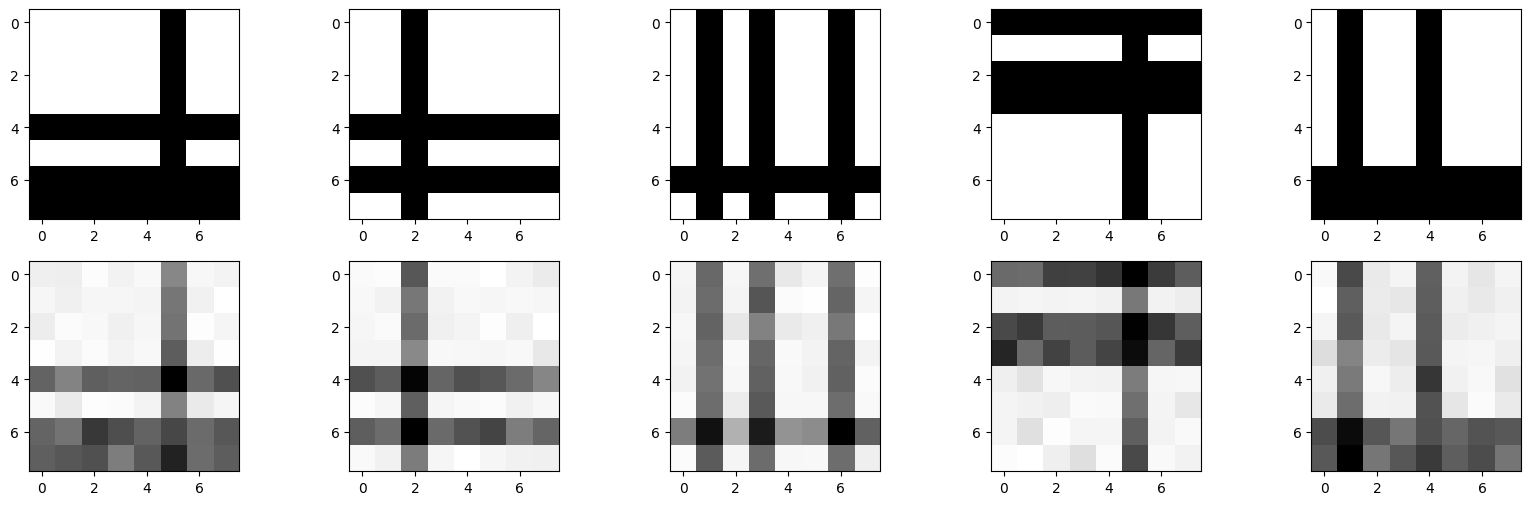

20314.466480893178
Norm: 20314.466480893178, dimension: 42


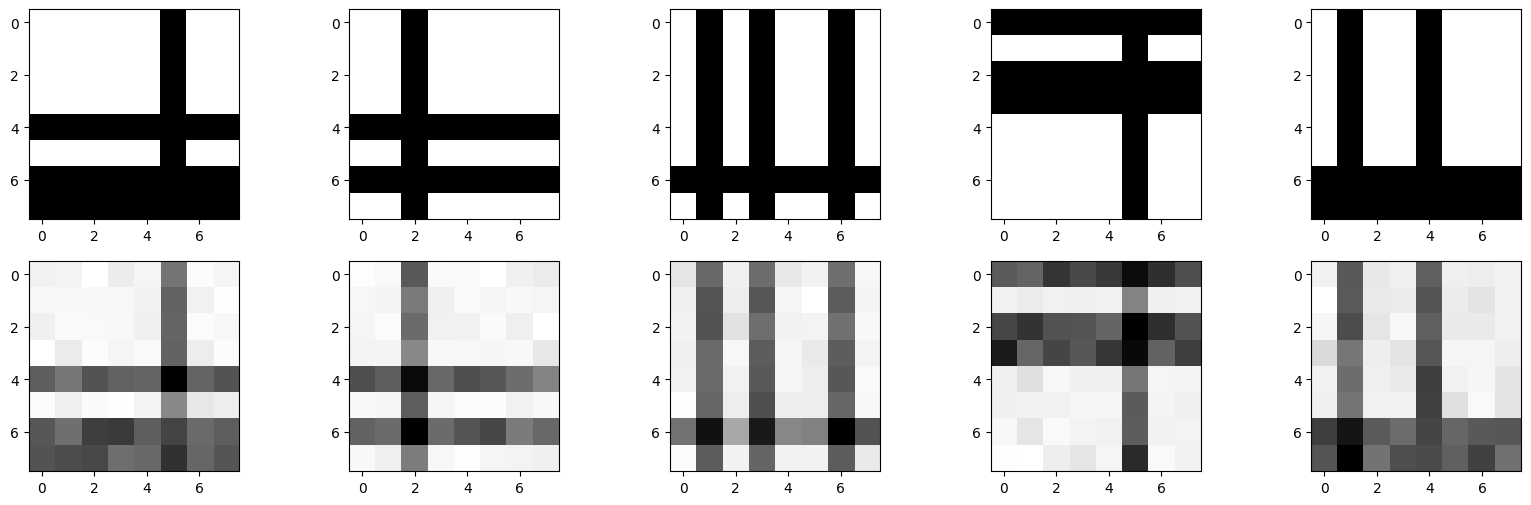

18806.121990167678
Norm: 18806.121990167678, dimension: 45


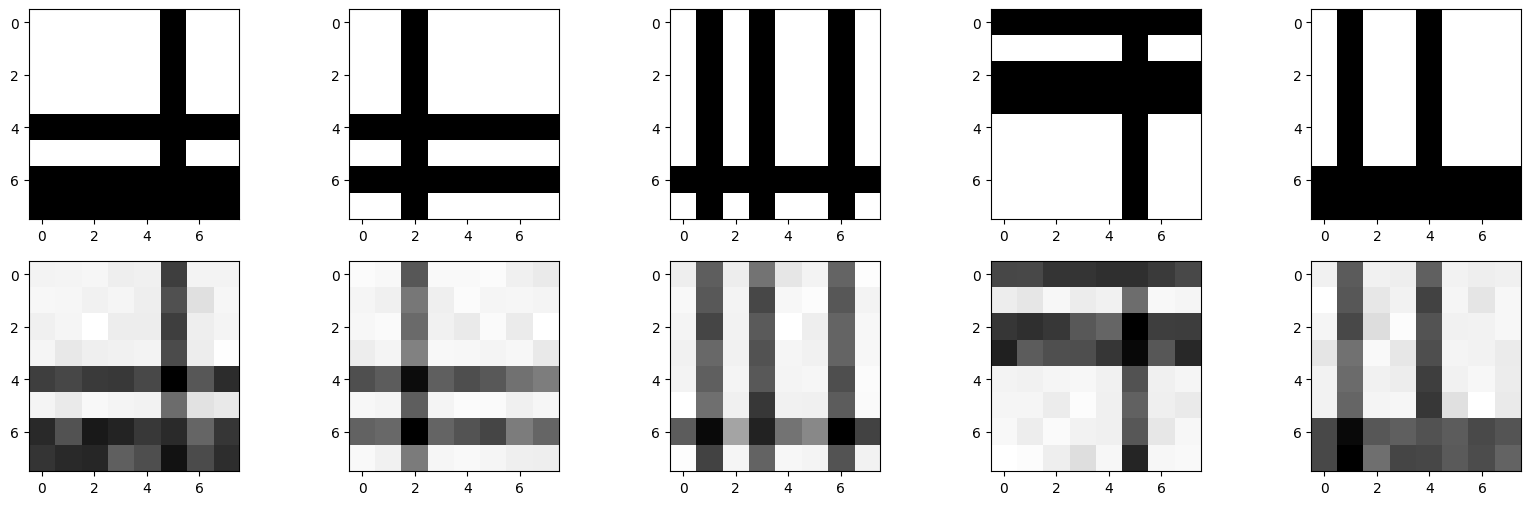

17184.931273539525
Norm: 17184.931273539525, dimension: 48


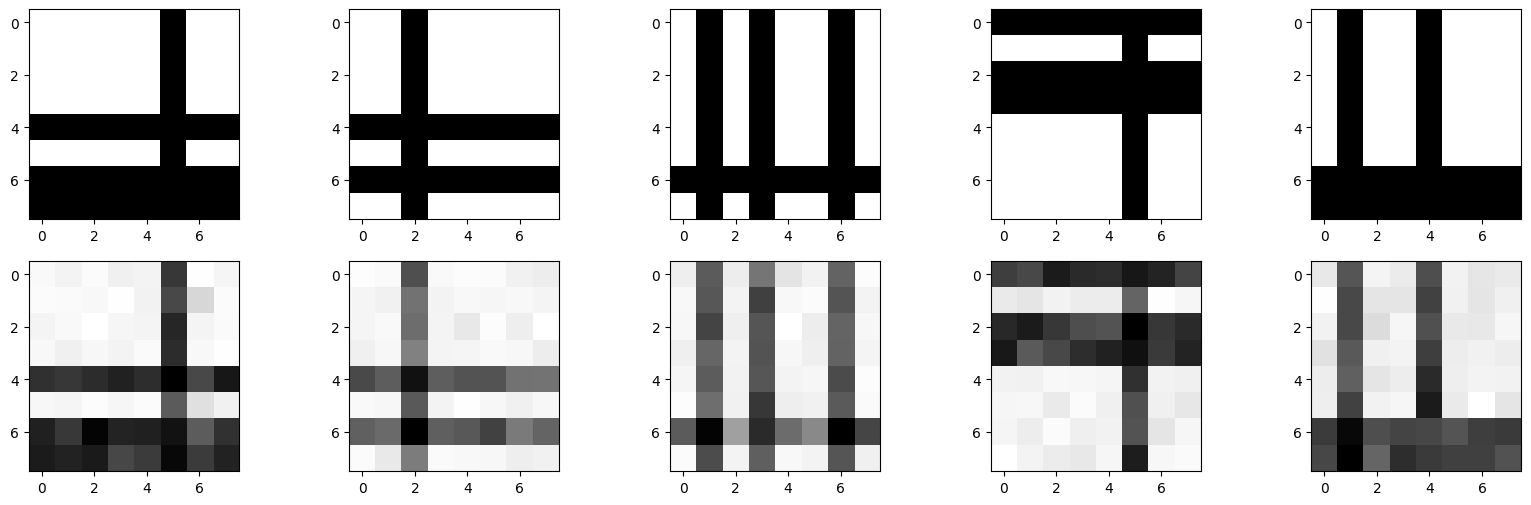

15426.306974744224
Norm: 15426.306974744224, dimension: 51


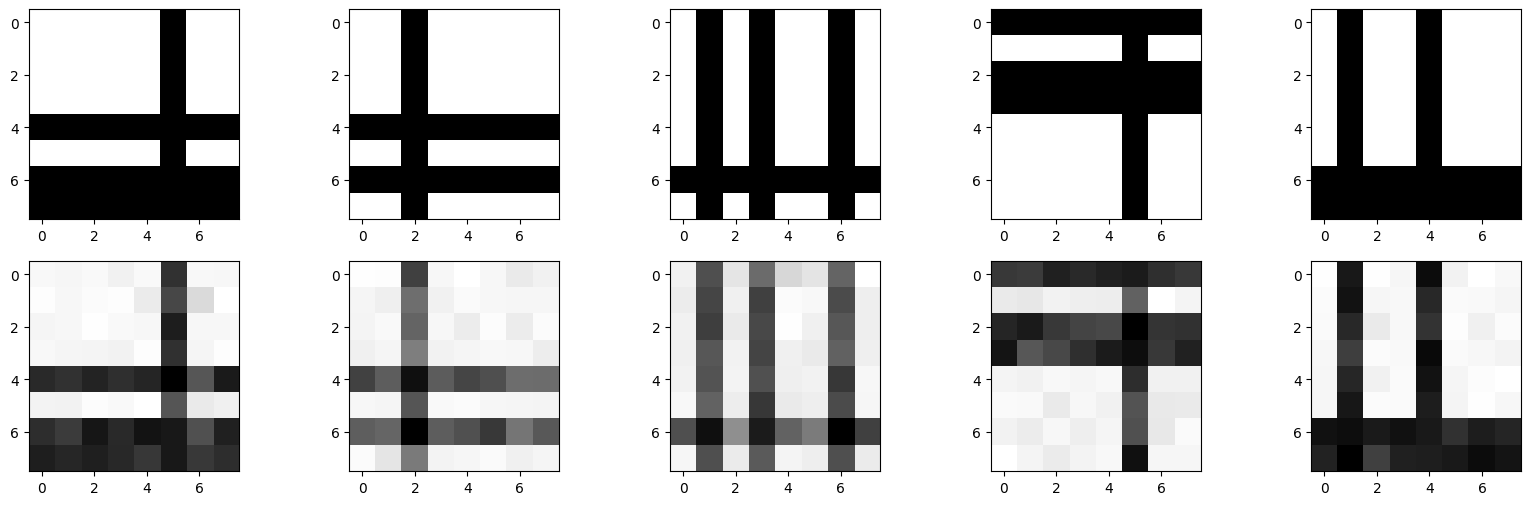

13467.563922646521
Norm: 13467.563922646521, dimension: 54


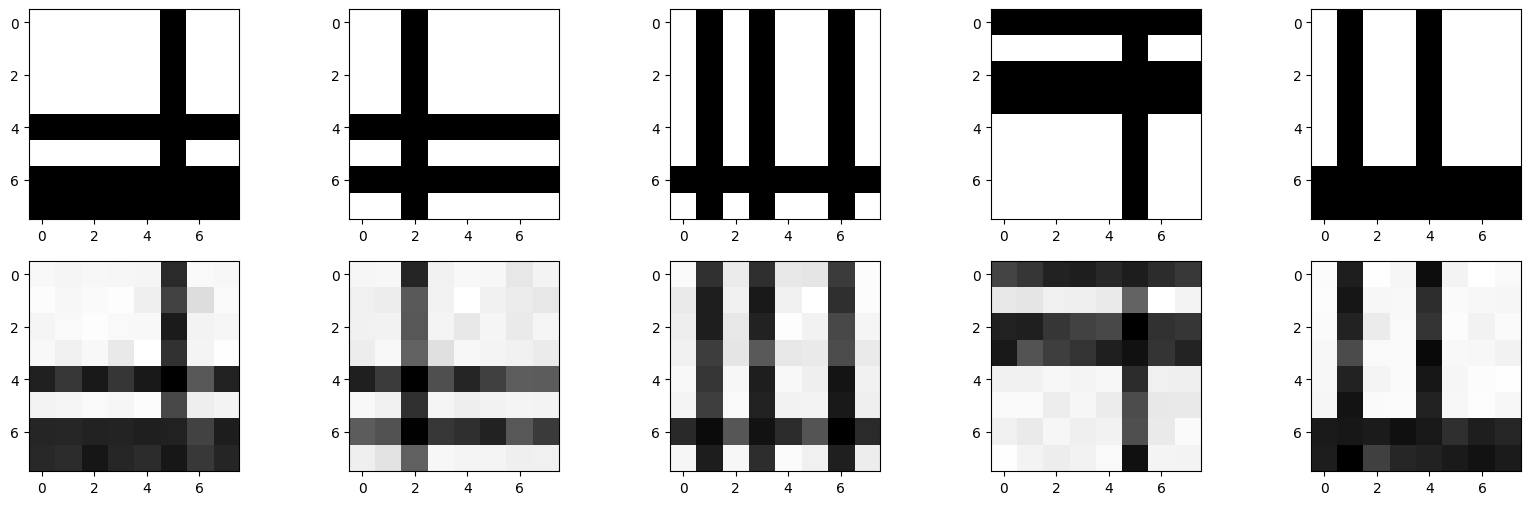

11204.11717862348
Norm: 11204.11717862348, dimension: 57


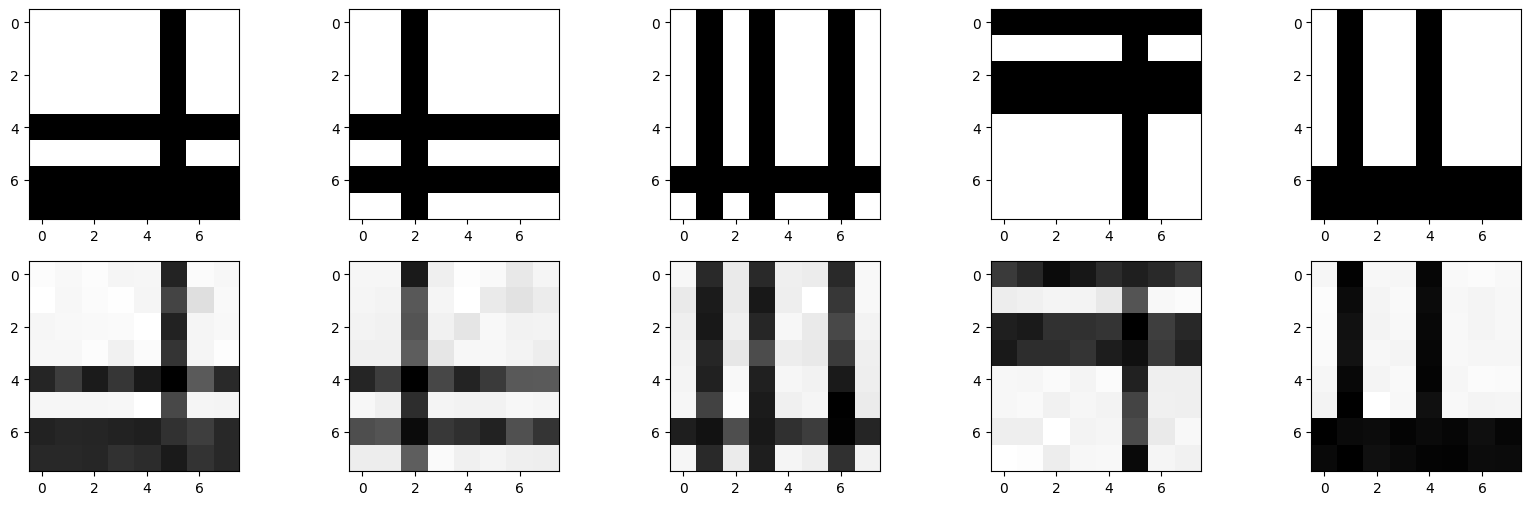

8407.495970969016
Norm: 8407.495970969016, dimension: 60


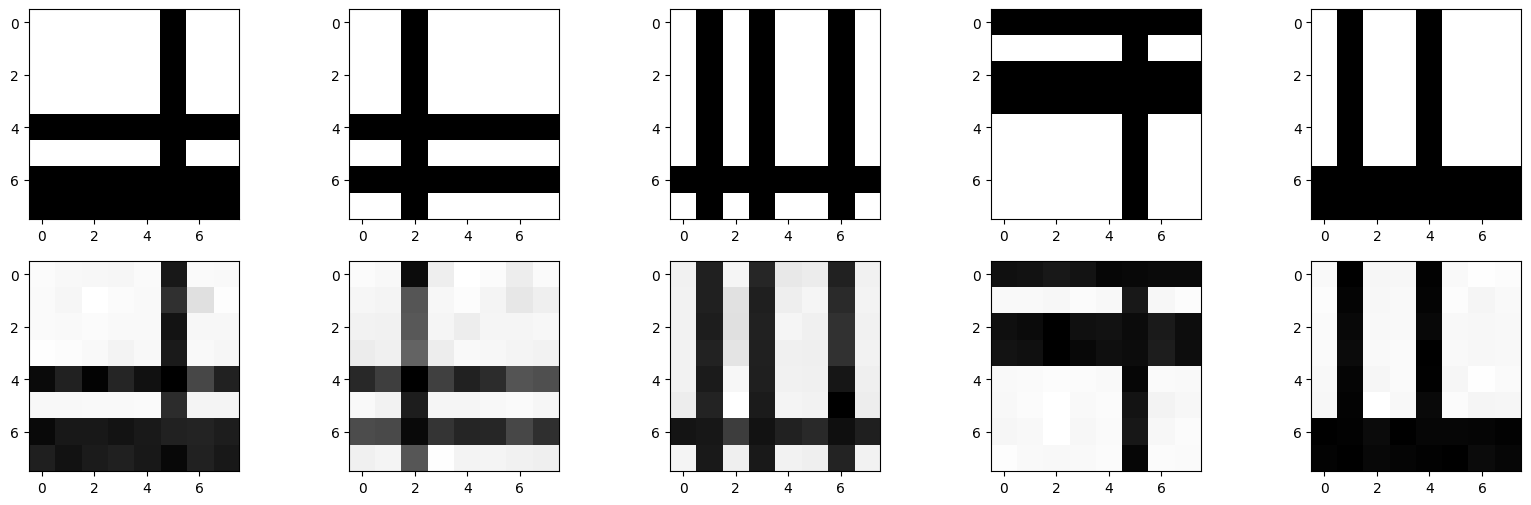

ValueError: shapes (10000,66) and (64,64) not aligned: 66 (dim 1) != 64 (dim 0)

In [32]:
norm_X = []
for dimen in dimensions:
  R = U[:,:dimen].dot(np.diag(s[:dimen])).dot(V_T[:dimen, :])
  norm = np.linalg.norm(X-R)
  print(norm)
  norm_X.append(norm)
  figure, axis = plt.subplots(2, 5, figsize=(20,6))
  print('Norm: {0}, dimension: {1}'.format(norm, dimen))

  for img in range(5):
    axis[0,img].imshow(X[img].reshape((8,8)), cmap='Greys')
    axis[1,img].imshow(R[img].reshape((8,8)), cmap='Greys')
  plt.show()

### Qustion: What does the number from previous cell mean? What is the output from *np.linalg.norm* function?

Answer: 

### Find good number of features/dimension for our toy datasets
- Our datasets **X_noise_20** and **X_noise_50** contain noise, we want to use dimension reduction to eliminate impact of noise in our dataset
- **Try different number of dimensions for dimension reduction, calculate Frobenius norm for reconstructed and original matrix, create plot with results afterwards.**
- Repeat proces for datasets **X**, **X_noise_20**, **X_noise_50**


### Interpret results based on previous graphs. What is the best number of dimensions? Why? What kind of information our toy dataset have?

Interpretation:

### Visualize record *X_noise_50\[2\]* in form of 8x8 image from reconstructed matrix produced for best dimension reduction parameter. Did the use of reduced space helped?

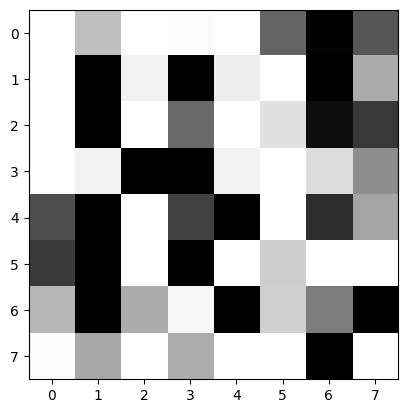

In [25]:
show_image(X_noise_50[2])

## Task 2(1p) : Dimension reduction and visualization of clustering results

We have tried some clustering for **Country data** last week. I have copied the most important cells into this notebook.

1. Fill in any clustering method for our dataset **Country data**, you can use already scaled matrix **X_scaled**.
2. Lets use other dimension reduction techniques: PCA and TSNE from sklearn library and get 2D space representation for our matrix **X_scaled**.
3. Use 2D representation from dimension reduction methods for 2D visualization of **Country data** and use color for displaying clusters found in matrix **X_scaled** - create at least two scatter plots for data points and use cluster_id as point's color.

- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [26]:
df = pd.read_csv('data_clustering/country-data.csv')
df_only_numeric = df.select_dtypes(np.number)
scaler = sklearn.preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(df_only_numeric.values)

FileNotFoundError: [Errno 2] No such file or directory: 'data_clustering/country-data.csv'

### Clustering

Use any clustering method for preprocessed data.

Be aware to apply clustering for **X_scaled**, which is n-diminensional data. Do not use clustering only on 2D representation after dimension reduction. 

### 2D vis

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Sample output of 2D visualization obtained by PCA method with labels from k-Means clustering

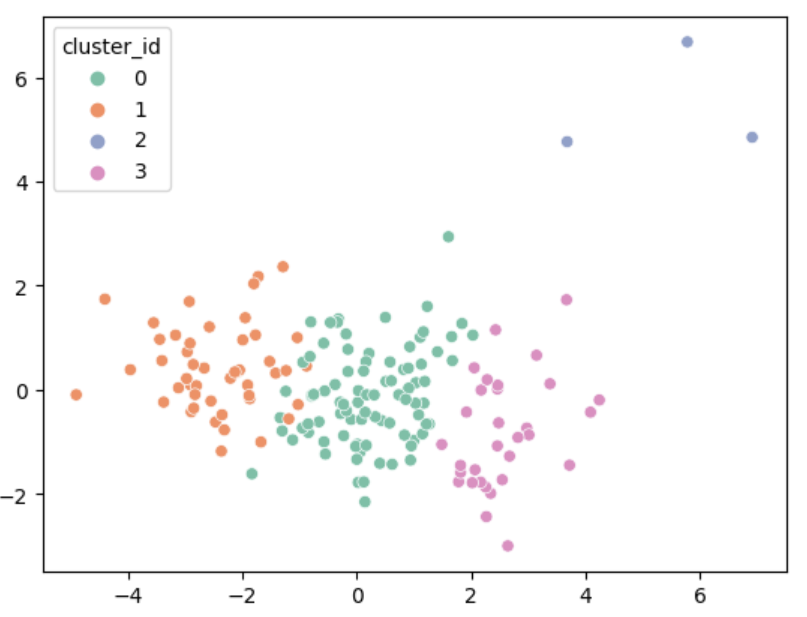